In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder #Preparing our data for modeling

In [54]:
airbnb = pd.read_csv('C:/Users/Victo/Airbnb/berlin_weekdays.csv')
airbnb.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,185.799757,Private room,False,True,2.0,True,0,0,10.0,98.0,1,3.582211,0.174706,105.063708,16.019042,148.941114,30.710638,13.42344,52.49150
1,1,194.914462,Private room,False,True,5.0,False,0,1,9.0,86.0,1,3.525410,0.511922,75.339529,11.487002,106.442356,21.947685,13.46800,52.51900
2,2,176.217631,Private room,False,True,2.0,False,0,0,9.0,91.0,1,3.801713,0.281397,73.669176,11.232324,105.440205,21.741048,13.47096,52.51527
3,3,207.768533,Private room,False,True,3.0,True,0,0,10.0,97.0,1,0.982408,0.705573,133.187409,20.307057,198.233362,40.874362,13.42281,52.53139
4,4,150.743199,Private room,False,True,2.0,False,0,0,10.0,99.0,1,8.869697,2.187188,39.860151,6.077469,50.996308,10.515090,13.52440,52.47842


In [55]:
airbnb.describe()

,Unnamed: 0,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000
mean,641.500000,240.220422,2.799844,0.275701,0.183801,9.475078,94.299065,1.084112,5.264371,0.838046,109.798325,16.740928,146.625870,30.233250,13.399500,52.509209
std,370.803182,230.318175,1.216142,0.447041,0.387472,0.834843,6.912388,0.571413,3.681616,1.243048,70.027748,10.677116,79.784350,16.450987,0.071955,0.033138
min,0.000000,64.971487,2.000000,0.000000,0.000000,4.000000,20.000000,0.000000,0.180926,0.011382,16.600735,2.531111,21.455803,4.424040,13.116320,52.382940
25%,320.750000,143.731887,2.000000,0.000000,0.000000,9.000000,92.000000,1.000000,2.857516,0.274763,68.028312,10.372263,92.151081,19.000922,13.359245,52.491348
50%,641.500000,187.786295,2.000000,0.000000,0.000000,10.000000,96.000000,1.000000,4.300548,0.446999,91.293782,13.919544,131.109757,27.033934,13.407505,52.509280
75%,962.250000,277.005235,3.000000,1.000000,0.000000,10.000000,99.000000,1.000000,6.663819,0.806559,131.368925,20.029793,184.380250,38.017945,13.440095,52.530295
max,1283.000000,5857.483407,6.000000,1.000000,1.000000,10.000000,100.000000,9.000000,22.617451,13.314108,655.867615,100.000000,484.982156,100.000000,13.707020,52.641410


In [56]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1284 non-null   int64  
 1   realSum                     1284 non-null   float64
 2   room_type                   1284 non-null   object 
 3   room_shared                 1284 non-null   bool   
 4   room_private                1284 non-null   bool   
 5   person_capacity             1284 non-null   float64
 6   host_is_superhost           1284 non-null   bool   
 7   multi                       1284 non-null   int64  
 8   biz                         1284 non-null   int64  
 9   cleanliness_rating          1284 non-null   float64
 10  guest_satisfaction_overall  1284 non-null   float64
 11  bedrooms                    1284 non-null   int64  
 12  dist                        1284 non-null   float64
 13  metro_dist                  1284 

In [57]:
le = LabelEncoder()

for col in airbnb.columns:
    if airbnb[col].dtype == 'bool':
        print(f"Column '{col}' is boolean and will be converted to binary using LabelEncoder.")
        
        # Fit and transform the LabelEncoder on the column
        airbnb[col] = le.fit_transform(airbnb[col])

airbnb.head()

Column 'room_shared' is boolean and will be converted to binary using LabelEncoder.
Column 'room_private' is boolean and will be converted to binary using LabelEncoder.
Column 'host_is_superhost' is boolean and will be converted to binary using LabelEncoder.


,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,185.799757,Private room,0,1,2.0,1,0,0,10.0,98.0,1,3.582211,0.174706,105.063708,16.019042,148.941114,30.710638,13.42344,52.49150
1,1,194.914462,Private room,0,1,5.0,0,0,1,9.0,86.0,1,3.525410,0.511922,75.339529,11.487002,106.442356,21.947685,13.46800,52.51900
2,2,176.217631,Private room,0,1,2.0,0,0,0,9.0,91.0,1,3.801713,0.281397,73.669176,11.232324,105.440205,21.741048,13.47096,52.51527
3,3,207.768533,Private room,0,1,3.0,1,0,0,10.0,97.0,1,0.982408,0.705573,133.187409,20.307057,198.233362,40.874362,13.42281,52.53139
4,4,150.743199,Private room,0,1,2.0,0,0,0,10.0,99.0,1,8.869697,2.187188,39.860151,6.077469,50.996308,10.515090,13.52440,52.47842


In [58]:
X = airbnb['person_capacity'].values
y = airbnb['realSum'].values

In [64]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [65]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size= 1/3, random_state=0)

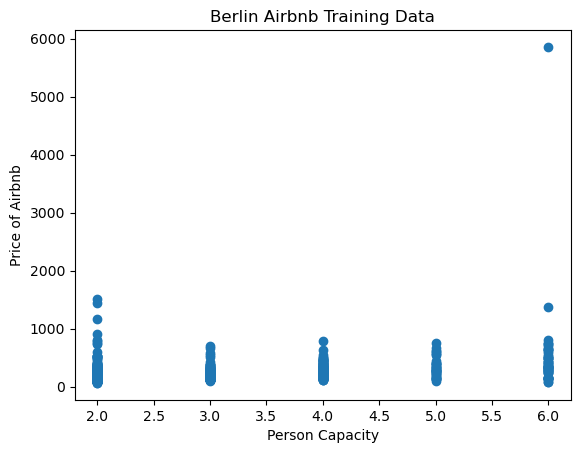

In [66]:
plt.scatter(X_train, y_train)
plt.xlabel('Person Capacity')
plt.ylabel('Price of Airbnb')
plt.title('Berlin Airbnb Training Data')
plt.show()

In [67]:
from sklearn.ensemble import RandomForestRegressor
Regressor = RandomForestRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)
print(f'Train Accuracy {round(Regressor.score(X_train, y_train)* 100,2)}%')
print(f'Test Accuracy {round(Regressor.score(X_test, y_test)* 100,2)}%')

Train Accuracy 9.93%
Test Accuracy 10.18%


C:\Users\Victo\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
